In [1]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, DateFormatter
import datetime as dt
from sklearn import preprocessing
from matplotlib.dates import HourLocator, DateFormatter

In [2]:
soil_flux = pd.read_excel('/Users/varungandhi/Downloads/case study 1/gstor.xlsm', sheet_name= 'final',header=1)
soil_flux_feb = pd.read_excel('/Users/varungandhi/Downloads/case study 1/gstor_feb.xlsm', sheet_name= 'finale_5min',header=1)

In [3]:
time_range = pd.date_range(start='2020-11-20 16:40', end='2020-12-02 13:25', freq='5T')
soil_flux['TIMESTAMP_UTC'] = time_range
time_range2 = pd.date_range(start='2020-12-29 15:35', end='2021-05-04 12:45', freq='5T')
soil_flux_feb['TIMESTAMP_UTC'] = time_range2

In [35]:
rad = pd.read_pickle('/Users/varungandhi/Desktop/data_1/Data_BME_garden.pkl')
rad['TIMESTAMP_UTC'] = pd.to_datetime(rad['TIMESTAMP_UTC'])

In [36]:
rad = rad.resample('5T', on= 'TIMESTAMP_UTC', label= 'right', closed = 'right').mean()

In [37]:
rad.reset_index(inplace= True)


In [38]:
#merge = pd.merge(flux, rad, on = 'TIMESTAMP_UTC', how = 'left')

In [39]:
rad['Rn'] = rad['Sup_corr'] +rad['Lup_corr'] -rad['SDn_corr'] -rad['LDn_corr'] 

In [40]:
flux1 = pd.read_csv('/Users/varungandhi/Desktop/eddypro_data/nov/eddy_out_5/eddypro_csat_full_output_2022-03-11T141139_exp.csv',
                    header=[1,2])
flux1.columns = flux1.columns.map('_'.join)


flux2 = pd.read_csv('/Users/varungandhi/Desktop/eddypro_data/feb/02_02_06_02/eddy_5min/eddypro_csat_full_output_2022-03-18T152755_exp.csv',
                    header=[1,2])
flux2.columns = flux2.columns.map('_'.join)

In [41]:
flux1['TIMESTAMP']  =flux1['date_[yyyy-mm-dd]'].astype(str)+" "+ flux1['time_[HH:MM]'].astype(str)
flux1['TIMESTAMP']  = pd.to_datetime(flux1['TIMESTAMP'])
flux1['H_[W+1m-2]'] = pd.to_numeric(flux1['H_[W+1m-2]'])
flux1['LE_[W+1m-2]'] = pd.to_numeric(flux1['LE_[W+1m-2]'])

In [42]:
flux2['TIMESTAMP']  =flux2['date_[yyyy-mm-dd]'].astype(str)+" "+ flux2['time_[HH:MM]'].astype(str)
flux2['TIMESTAMP']  = pd.to_datetime(flux2['TIMESTAMP'])
flux2['H_[W+1m-2]'] = pd.to_numeric(flux2['H_[W+1m-2]'])
flux2['LE_[W+1m-2]'] = pd.to_numeric(flux2['LE_[W+1m-2]'])

In [43]:
flux1['TIMESTAMP_UTC']=flux1['TIMESTAMP'].values - np.timedelta64(2, 'h')
flux2['TIMESTAMP_UTC']=flux2['TIMESTAMP'].values - np.timedelta64(2, 'h')

In [44]:
def clean_flux(df):
    x1 = []
    x2 = []
    x3 = []
    x4 = []
    
    for i in range(len(df['qc_H_[#]'].values)):
        if df['qc_H_[#]'].values[i] >= 2.:
            x1.append(float('NAN'))
        else:
            x1.append(df['H_[W+1m-2]'].values[i])
    
    for i in range(len(df['qc_LE_[#]'].values)):
        if df['qc_LE_[#]'].values[i] >= 2.:
            x2.append(float('NAN'))
        else:
            x2.append(df['LE_[W+1m-2]'].values[i])
            
    for i in range(len(x1)):
        if x1[i] < -1000:
            x3.append(float('nan'))
        else:
            x3.append(x1[i])
            
    for i in range(len(x2)):
        if x2[i] < -1000:
            x4.append(float('nan'))
        else:
            x4.append(x2[i])
    return x3,x4
        
        

In [45]:
flux1['H_[W+1m-2]'],flux1['LE_[W+1m-2]'] = clean_flux(flux1)
flux2['H_[W+1m-2]'],flux2['LE_[W+1m-2]'] = clean_flux(flux2)

In [46]:
rad.columns

Index(['TIMESTAMP_UTC', 'RECORD', 'kohms_Avg', 'AirTC_1_Avg', 'RH_1_orig',
       'RH_1_corr', 'RH1_corr_cut', 'AirTC_2_Avg', 'RH_2', 'RH_2_corr',
       'RH_2_corr_cut', 'SUp_Avg', 'Sup_corr', 'SDn_Avg', 'SDn_corr',
       'LUp_Avg', 'Lup_corr', 'LDn_Avg', 'LDn_corr', 'CNR1TC_Avg',
       'CNR1TK_Avg', 'SUp_Min', 'SDn_Min', 'LUp_Min', 'LDn_Min', 'CNR1TC_Min',
       'CNR1TK_Min', 'SUp_Max', 'SDn_Max', 'LUp_Max', 'LDn_Max', 'CNR1TC_Max',
       'CNR1TK_Max', 'SUp_Std', 'SDn_Std', 'LUp_Std', 'LDn_Std', 'CNR1TC_Std',
       'CNR1TK_Std', 'Shf_1_Avg', 'Shf_2_Avg', 'batt_volt_Avg', 'T1_Avg',
       'T2_Avg', 'T3_Avg', 'VW_Avg', 'PA_uS_Avg', 'VW_2_Avg', 'PA_uS_2_Avg',
       'mean_wind_speed', 'mean_wind_direction', 'std_wind_dir', 'samples_TOT',
       'diag_1_TOT', 'diag_2_TOT', 'diag_4_TOT', 'diag_8_TOT', 'diag_9_TOT',
       'diag_10_TOT', 'nnd_TOT', 'checksum_err_TOT', 'wind_speed_1_Min',
       'wind_speed_1_Max', 'wind_speed_1_Std', 'wind_direction_1_Min',
       'wind_direction_1_Ma

In [47]:
flux1 = flux1[['TIMESTAMP_UTC', 'H_[W+1m-2]', 'LE_[W+1m-2]']]
flux2 = flux2[['TIMESTAMP_UTC', 'H_[W+1m-2]', 'LE_[W+1m-2]']]

In [48]:
rad

,TIMESTAMP_UTC,RECORD,kohms_Avg,AirTC_1_Avg,RH_1_orig,RH_1_corr,RH1_corr_cut,AirTC_2_Avg,RH_2,RH_2_corr,...,diag_10_TOT_2,nnd_TOT_2,checksum_err_TOT_2,wind_speed_2_Min,wind_speed_2_Max,wind_speed_2_Std,wind_direction_2_Min,wind_direction_2_Max,wind_direction_2_Std,Rn
0,2020-11-20 16:25:00,1.5,7999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,22.75,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-81.948277
1,2020-11-20 16:30:00,5.5,7999.0,5.780667,51.6700,51.6700,51.6700,5.671667,52.6000,52.6000,...,0.0,7.25,0.0,0.906667,3.643333,0.644333,92.666667,355.666667,59.936667,-86.266804
2,2020-11-20 16:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-11-20 16:40:00,10.0,7999.0,5.598000,52.3100,52.3100,52.3100,5.476400,53.4660,53.4660,...,0.0,0.20,0.0,0.655000,3.217500,0.580750,6.250000,350.250000,109.345000,-86.311034
4,2020-11-20 16:45:00,14.5,7999.0,5.534750,52.5175,52.5175,52.5175,5.414250,53.3475,53.3475,...,0.0,0.25,0.0,0.673333,3.036667,0.648667,104.333333,355.000000,88.333333,-87.818275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47449,2021-05-04 10:30:00,237229.0,-7999.0,17.964000,37.6900,37.6900,37.6900,18.414000,37.7720,37.7720,...,0.0,0.00,0.0,0.820000,5.148000,1.025800,142.800000,253.200000,29.908000,521.362009
47450,2021-05-04 10:35:00,237234.0,-4799.4,17.962000,37.7460,37.7460,37.7460,18.426000,38.0660,38.0660,...,0.0,0.00,0.0,0.876000,5.450000,1.086400,139.400000,270.000000,27.286000,463.581418
47451,2021-05-04 10:40:00,237239.0,-7999.0,18.024000,37.9220,37.9220,37.9220,18.558000,38.1520,38.1520,...,0.0,0.20,0.0,0.566000,4.506000,0.894200,125.600000,257.400000,25.808000,525.810172
47452,2021-05-04 10:45:00,237244.0,-7999.0,18.160000,37.6640,37.6640,37.6640,18.676000,37.7560,37.7560,...,0.0,0.00,0.0,0.870000,5.258000,0.874600,135.800000,262.800000,32.956000,524.313595


In [49]:
#flux2.to_excel('/Users/varungandhi/Downloads/flux_feb.xlsx')
rad = rad[['TIMESTAMP_UTC', 'Rn', 'SUp_Avg', 'Sup_corr', 'SDn_Avg', 'SDn_corr',
          'LUp_Avg', 'Lup_corr', 'LDn_Avg', 'LDn_corr']]
rad.to_excel('/Users/varungandhi/Downloads/rad_nov.xlsx')
#soil_flux_feb.to_excel('/Users/varungandhi/Downloads/soil_feb.xlsx')

In [18]:
merge2 = pd.read_excel('/Users/varungandhi/Downloads/case study 1/flux_nov.xlsx')
merge2['TIMESTAMP_UTC'] = pd.to_datetime(merge2['TIMESTAMP_UTC'])

In [19]:
merge3 = pd.read_excel('/Users/varungandhi/Downloads/case study 1/flux_feb.xlsx')
merge3['TIMESTAMP_UTC'] = pd.to_datetime(merge3['TIMESTAMP_UTC'])

In [20]:
merge2 = merge2.resample('30T', on = 'TIMESTAMP_UTC', closed='right', label='right').mean()
merge2.reset_index(inplace = True)


In [21]:

merge3 = merge3.resample('30T', on = 'TIMESTAMP_UTC', closed='right', label='right').mean()
merge3.reset_index(inplace = True)

In [22]:
a = merge3['TIMESTAMP_UTC'].values
b = np.datetime_as_string(a, unit = 'm')
np.where(b == '2021-02-04T00:00')

(array([99]),)

In [23]:
t1 = 75
t2 = 219
a1 = merge2['TIMESTAMP_UTC'][130]
b1 = merge2['TIMESTAMP_UTC'][168]
a2 = merge2['TIMESTAMP_UTC'][168]
b2 = merge2['TIMESTAMP_UTC'][198]

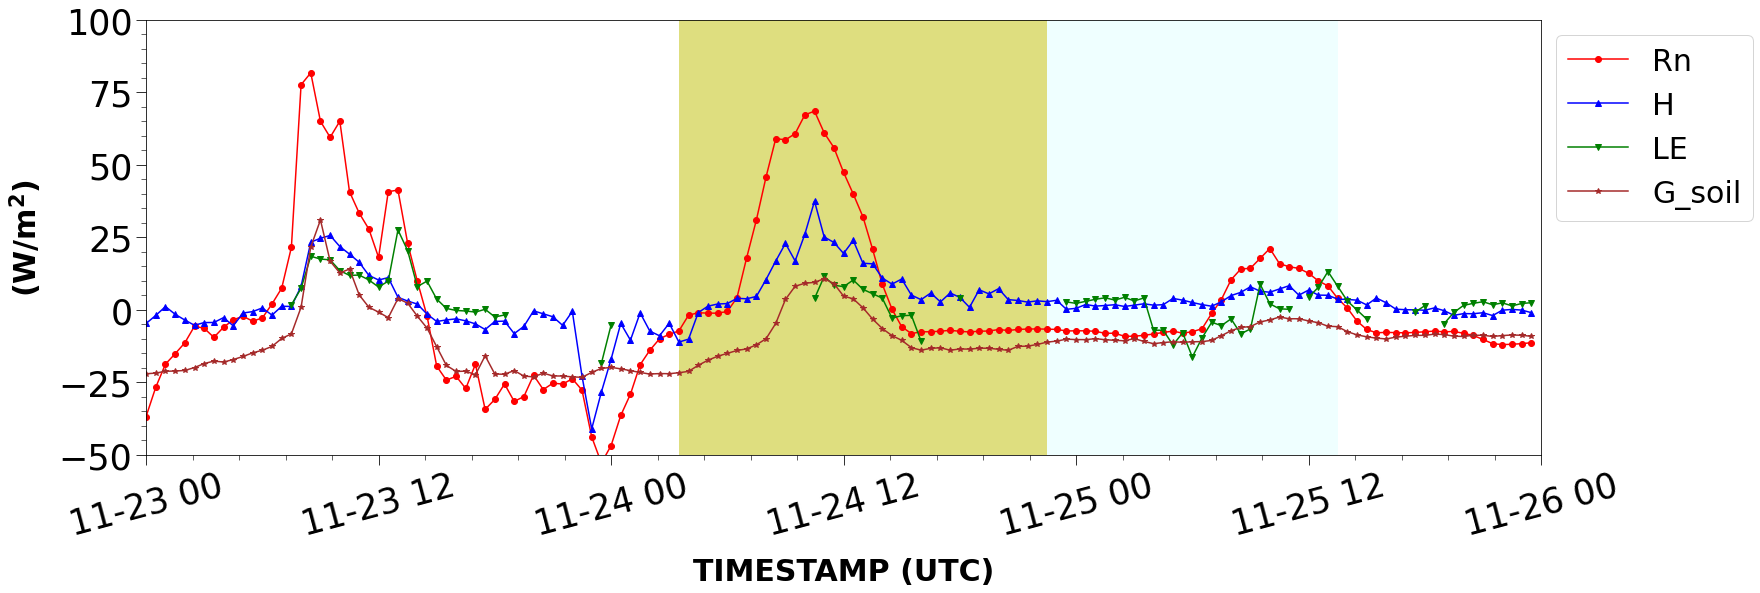

In [24]:
fig, ax1 = plt.subplots(1,1,figsize = (25,8))
l1_1 = ax1.plot(merge2['TIMESTAMP_UTC'][t1:t2], merge2['Rn']         [t1:t2], marker = 'o',color = 'red'  ,label = 'Rn')
l1_2 = ax1.plot(merge2['TIMESTAMP_UTC'][t1:t2], merge2['H_[W+1m-2]'] [t1:t2], marker = '^',color = 'blue' ,label = 'H')
l1_3 = ax1.plot(merge2['TIMESTAMP_UTC'][t1:t2], merge2['LE_[W+1m-2]'][t1:t2], marker = 'v',color = 'green',label = 'LE')
l1_4 = ax1.plot(merge2['TIMESTAMP_UTC'][t1:t2], merge2['soil_flux']  [t1:t2], marker = '*',color = 'brown',label = 'G_soil')
l1_5 = ax1.plot(merge2['TIMESTAMP_UTC'][t1:t2], merge2['s']  [t1:t2], marker = '*',color = 'brown',label = 'G_soil')


ax1.axvspan(a1, b1, color='y', alpha=0.5, lw=0)
ax1.axvspan(a2, b2, color='lightcyan', alpha=0.5, lw=0)
ax1.set_xlabel('TIMESTAMP (UTC)',fontsize= 30,labelpad = 15,fontweight = 'bold')
ax1.set_ylabel('$\mathbf{(W/m^2)}$',fontsize = 30,labelpad = 15)
ax1.minorticks_on()
ax1.set_xbound(dt.date(2020,11,23), dt.date(2020,11,26))
ax1.xaxis.set_major_formatter(DateFormatter("%m-%d %H"))
ax1.tick_params(axis='both', which='major', labelsize=35,size = 10)
ax1.tick_params(axis='both', which='minor', labelsize=35,size = 5)
ax1.tick_params(axis='x', labelrotation= 15)

ax1.set_ylim([-50,100])
ax1.set_yticks(np.arange(-50,101,25))

def x(l1,l2,l3, l4):
    lns = l1+l2+l3+l4
    labs = [l.get_label() for l in lns]
    return [lns,labs]

ax1.legend(x(l1_1,l1_2,l1_3, l1_4)[0],x(l1_1,l1_2,l1_3,l1_4)[1],
           prop = {'size':30},ncol = 1,bbox_to_anchor=(1.0, 1.0))


In [25]:

a = merge3['TIMESTAMP_UTC'].values
b = np.datetime_as_string(a, unit = 'm')
np.where(b == '2021-02-03T10:00')

(array([71]),)

In [26]:
t3 = 3
t4 = 99

In [51]:
##Rainy periods
f1 = merge3['TIMESTAMP_UTC'][8]
f2 = merge3['TIMESTAMP_UTC'][11]
f3 = merge3['TIMESTAMP_UTC'][24]
f4 = merge3['TIMESTAMP_UTC'][30]
f5 = merge3['TIMESTAMP_UTC'][33]
f6 = merge3['TIMESTAMP_UTC'][37]
f7 = merge3['TIMESTAMP_UTC'][73]
f8 = merge3['TIMESTAMP_UTC'][77]
##fog periods
a3 = merge3['TIMESTAMP_UTC'][37]
b3 = merge3['TIMESTAMP_UTC'][71]
f7

Timestamp('2021-02-03 11:00:00')

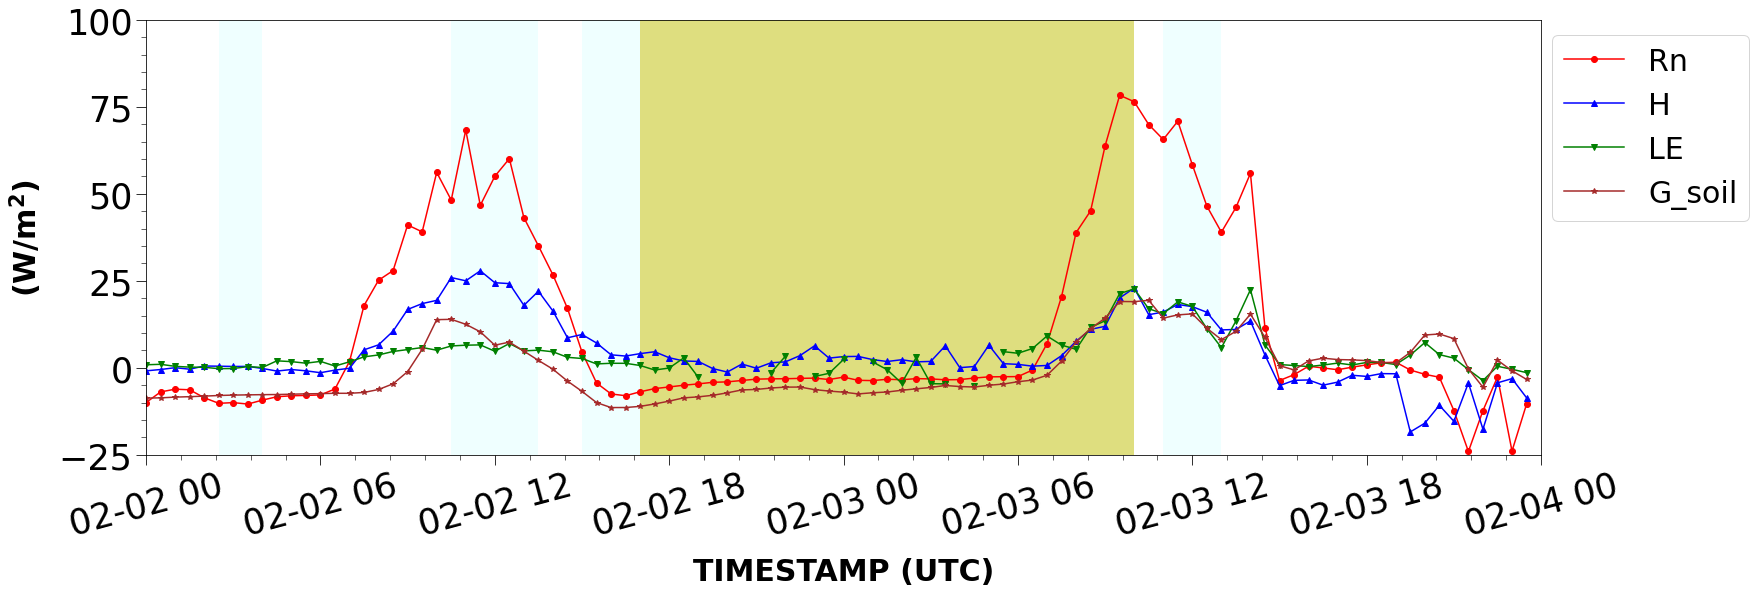

In [29]:
fig, ax1 = plt.subplots(1,1,figsize = (25,8))
l1_1 = ax1.plot(merge3['TIMESTAMP_UTC'][t3:t4], merge3['Rn']         [t3:t4],marker = 'o',color = 'red'  ,label = 'Rn')
l1_2 = ax1.plot(merge3['TIMESTAMP_UTC'][t3:t4], merge3['H_[W+1m-2]'] [t3:t4],marker = '^',color = 'blue' ,label = 'H')
l1_3 = ax1.plot(merge3['TIMESTAMP_UTC'][t3:t4], merge3['LE_[W+1m-2]'][t3:t4],marker = 'v',color = 'green',label = 'LE')
l1_4 = ax1.plot(merge3['TIMESTAMP_UTC'][t3:t4], merge3['soil_flux']  [t3:t4],marker = '*',color = 'brown',label = 'G_soil')


ax1.axvspan(a3, b3, color='y', alpha=0.5, lw=0)
ax1.axvspan(f1,f2, color='lightcyan', alpha=0.5, lw=0)
ax1.axvspan(f3,f4, color='lightcyan', alpha=0.5, lw=0)
ax1.axvspan(f5,f6, color='lightcyan', alpha=0.5, lw=0)
ax1.axvspan(f7,f8, color='lightcyan', alpha=0.5, lw=0)

ax1.set_xlabel('TIMESTAMP (UTC)',fontsize= 30,labelpad = 15,fontweight = 'bold')
ax1.set_ylabel('$\mathbf{(W/m^2)}$',fontsize = 30,labelpad = 15)
ax1.minorticks_on()

ax1.tick_params(axis='both', which='major', labelsize=35,size = 10)
ax1.tick_params(axis='both', which='minor', labelsize=35,size = 5)
ax1.tick_params(axis='x', labelrotation= 15)

ax1.set_xbound(dt.date(2021,2,2), dt.date(2021,2,4))
ax1.xaxis.set_major_formatter(DateFormatter("%m-%d %H"))


ax1.set_ylim([-25,100])
ax1.set_yticks(np.arange(-25,101,25))
def x(l1,l2,l3, l4):
    lns = l1+l2+l3+l4
    labs = [l.get_label() for l in lns]
    return [lns,labs]

ax1.legend(x(l1_1,l1_2,l1_3, l1_4)[0],x(l1_1,l1_2,l1_3,l1_4)[1],
           prop = {'size':30},ncol = 1,bbox_to_anchor=(1.16, 1.0))


In [50]:
b3

Timestamp('2021-02-03 10:00:00')

In [143]:
merge2.to_excel('/Users/varungandhi/Downloads/energy_nov.xlsx')

In [122]:
flux2['TIMESTAMP_UTC']

0      2020-11-21 10:05:00
1      2020-11-21 10:10:00
2      2020-11-21 10:15:00
3      2020-11-21 10:20:00
4      2020-11-21 10:25:00
               ...        
3205   2020-12-02 13:10:00
3206   2020-12-02 13:15:00
3207   2020-12-02 13:20:00
3208   2020-12-02 13:25:00
3209   2020-12-02 13:30:00
Name: TIMESTAMP_UTC, Length: 3210, dtype: datetime64[ns]

In [129]:
merge2['soil_flux']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
3205   NaN
3206   NaN
3207   NaN
3208   NaN
3209   NaN
Name: soil_flux, Length: 3210, dtype: float64

In [130]:
flux2['TIMESTAMP_UTC']

0      2020-11-21 10:05:00
1      2020-11-21 10:10:00
2      2020-11-21 10:15:00
3      2020-11-21 10:20:00
4      2020-11-21 10:25:00
               ...        
3205   2020-12-02 13:10:00
3206   2020-12-02 13:15:00
3207   2020-12-02 13:20:00
3208   2020-12-02 13:25:00
3209   2020-12-02 13:30:00
Name: TIMESTAMP_UTC, Length: 3210, dtype: datetime64[ns]

In [141]:
merge['TIMESTAMP_UTC']

0       2020-11-20 16:25:00
1       2020-11-20 16:30:00
2       2020-11-20 16:35:00
3       2020-11-20 16:40:00
4       2020-11-20 16:45:00
                ...        
47449   2021-05-04 10:30:00
47450   2021-05-04 10:35:00
47451   2021-05-04 10:40:00
47452   2021-05-04 10:45:00
47453   2021-05-04 10:50:00
Name: TIMESTAMP_UTC, Length: 47454, dtype: datetime64[ns]

In [142]:
merge['soil_flux']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
47449   NaN
47450   NaN
47451   NaN
47452   NaN
47453   NaN
Name: soil_flux, Length: 47454, dtype: float64

In [212]:
x4

[58.9553,
 40.4446,
 38.1841,
 30.9699,
 62.3733,
 54.2389,
 41.1255,
 70.6212,
 50.1138,
 56.4069,
 24.7588,
 29.6779,
 44.3013,
 34.9395,
 42.3238,
 37.1671,
 55.2346,
 73.0586,
 65.605,
 51.675,
 21.4691,
 42.0426,
 14.985,
 72.9964,
 44.0895,
 45.8185,
 65.0672,
 47.8304,
 24.2834,
 23.1888,
 36.0451,
 38.6897,
 39.6194,
 20.4507,
 31.1565,
 33.8595,
 47.0308,
 32.3436,
 23.8914,
 29.6992,
 28.8426,
 29.634,
 23.6191,
 33.7446,
 12.5078,
 7.91014,
 20.7743,
 9.67048,
 12.8736,
 11.5243,
 22.0102,
 7.18214,
 nan,
 3.69125,
 7.56126,
 5.72905,
 3.09095,
 4.2734,
 1.50984,
 0.558507,
 2.14633,
 nan,
 1.55375,
 1.60812,
 1.26077,
 0.299904,
 0.787922,
 0.763577,
 nan,
 1.40791,
 nan,
 1.10845,
 3.40097,
 4.39086,
 2.15024,
 0.226865,
 -0.556063,
 -0.816908,
 nan,
 nan,
 1.04498,
 0.784097,
 nan,
 nan,
 -0.229054,
 0.095379,
 -0.141145,
 0.203521,
 nan,
 0.446087,
 -0.145746,
 0.270032,
 0.200519,
 -0.0273565,
 nan,
 -0.8761,
 -0.837636,
 0.07368,
 -0.204948,
 -0.00676139,
 -0.282273,
 